# Lab 8: Define and Solve an ML Problem of Your Choosing

In [7]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [8]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv('data/WHR2018Chapter2OnlineData.csv')

df.head(10)

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540
5,Afghanistan,2013,3.572100,7.503376,0.483552,51.042980,0.577955,0.074735,0.823204,0.620585,0.273328,0.482847,-1.879709,-1.403036,1.223690,0.342569,NaN,NaN,0.304368
6,Afghanistan,2014,3.130896,7.484583,0.525568,51.370525,0.508514,0.118579,0.871242,0.531691,0.374861,0.409048,-1.773257,-1.312503,1.395396,0.445686,NaN,NaN,0.413974
7,Afghanistan,2015,3.982855,7.466215,0.528597,51.693527,0.388928,0.094686,0.880638,0.553553,0.339276,0.260557,-1.844364,-1.291594,2.160618,0.542480,NaN,NaN,0.596918
8,Afghanistan,2016,4.220169,7.461401,0.559072,52.016529,0.522566,0.057072,0.793246,0.564953,0.348332,0.324990,-1.917693,-1.432548,1.796219,0.425627,NaN,NaN,0.418629
9,Afghanistan,2017,2.661718,7.460144,0.490880,52.339527,0.427011,-0.106340,0.954393,0.496349,0.371326,0.261179,NaN,NaN,1.454051,0.546283,NaN,NaN,0.286599


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

#### 1) I chose the 2018 World Happiness Report dataset.
2) I will be predicting a country's happiness index. Specifically the label 'Life Ladder'.
3) This is a supervised learning problem where the output (y) variable is a continuous value. Thus a regression problem.
4) We can find the features by dropping the label, using df.drop('Life Ladder', axis=1). Revealing a total of 18 columns, or 18 features.
5) This problem is important because we can outline which features contribute the most to a country's happiness. This data analysis can inform policy decisions by making targeted interventions in areas to improve a country's overall happiness. Commercially, organizations centered around well-being, social development, and community can use such models as well to drive their country's happiness.

#### Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [9]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
count,1562.000000,1562.000000,1535.000000,1549.000000,1553.000000,1533.000000,1482.000000,1472.000000,1544.000000,1550.000000,1401.000000,1391.000000,1391.000000,1562.000000,1562.000000,583.000000,1386.000000,1205.000000
mean,2011.820743,5.433676,9.220822,0.810669,62.249887,0.728975,0.000079,0.753622,0.708969,0.263171,0.480207,-0.126617,0.004947,2.003501,0.387271,0.372846,0.386948,0.445204
std,3.419787,1.121017,1.184035,0.119370,7.960671,0.145408,0.164202,0.185538,0.107644,0.084006,0.190724,0.873259,0.981052,0.379684,0.119007,0.086609,0.083694,0.105410
min,2005.000000,2.661718,6.377396,0.290184,37.766476,0.257534,-0.322952,0.035198,0.362498,0.083426,0.068769,-2.448228,-2.144974,0.863034,0.133908,0.241000,0.228833,0.223470
25%,2009.000000,4.606351,8.310665,0.748304,57.299580,0.633754,-0.114313,0.697359,0.621471,0.204116,0.334732,-0.772010,-0.717463,1.737934,0.309722,0.307000,0.321583,0.368531
50%,2012.000000,5.332600,9.398610,0.833047,63.803192,0.748014,-0.022638,0.808115,0.717398,0.251798,0.463137,-0.225939,-0.210142,1.960345,0.369751,0.349000,0.371000,0.425395
75%,2015.000000,6.271025,10.190634,0.904329,68.098228,0.843628,0.094649,0.880089,0.800858,0.311515,0.610723,0.665944,0.717996,2.215920,0.451833,0.433500,0.433104,0.508579
max,2017.000000,8.018934,11.770276,0.987343,76.536362,0.985178,0.677773,0.983276,0.943621,0.704590,0.993604,1.540097,2.184725,3.527820,1.022769,0.648000,0.626000,0.961435


In [10]:
df.dtypes # Data Types ('object' data type will not add any predictive power, so I will drop that feature)

country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            float64
Standard deviation of ladder by country-year    

In [11]:
df.isnull().mean().sort_values(ascending=False) #Missing Values (0.6267 is a LOT—this feature HAS to get dropped. 0.2286 may get dropepd too)

GINI index (World Bank estimate)                            0.626761
gini of household income reported in Gallup, by wp5-year    0.228553
GINI index (World Bank estimate), average 2000-15           0.112676
Delivery Quality                                            0.109475
Democratic Quality                                          0.109475
Confidence in national government                           0.103073
Perceptions of corruption                                   0.057618
Generosity                                                  0.051216
Freedom to make life choices                                0.018566
Log GDP per capita                                          0.017286
Positive affect                                             0.011524
Social support                                              0.008323
Negative affect                                             0.007682
Healthy life expectancy at birth                            0.005762
year                              

In [12]:
df.corr()['Life Ladder'].sort_values(ascending=False) #Correlations btwn Label & Features (values near 0 don't correlate much with label)

Life Ladder                                                 1.000000
Log GDP per capita                                          0.779476
Healthy life expectancy at birth                            0.729852
Delivery Quality                                            0.706673
Social support                                              0.700299
Democratic Quality                                          0.607034
Positive affect                                             0.554462
Freedom to make life choices                                0.526058
Generosity                                                  0.204910
year                                                       -0.014505
Confidence in national government                          -0.085543
GINI index (World Bank estimate)                           -0.097255
Standard deviation of ladder by country-year               -0.154257
GINI index (World Bank estimate), average 2000-15          -0.172745
Negative affect                   

In [13]:
#We need to find outliers, so I am going to write a function that calculates the IQR and finds outliers accordingly
outlier_dict = {}
def find_outliers(data):
    for col in df.select_dtypes('float64').columns: #loop through each column of floats
        Q1 = df[col].quantile(0.25) #first quartile
        Q3 = df[col].quantile(0.75) #third quartile
        IQR = Q3 - Q1 #interquartile range
        lower_bound = Q1 - (1.5 * IQR) #Lower Bound
        upper_bound = Q3 + (1.5 * IQR) #Upper Bound
        outliers = data[(data[col] < lower_bound)|(data[col] > upper_bound)] #Anything less than lower bound, or more than upperbound, is outleir
        outlier_dict[col] = len(outliers) #Set key,value pair for column and their # of outliers

    def get_outlier_count(pair): #Function to return the value in the dictionary—the # of outliers
        return pair[1]

    return sorted(outlier_dict.items(), key=get_outlier_count, reverse=True) #return a sorted tuple of key,value pairs of columns and their # of outleirs

find_outliers(df) #This dictionary outputs each feature, and their number of outliers

[('Perceptions of corruption', 130),
 ('Standard deviation/Mean of ladder by country-year', 37),
 ('Social support', 36),
 ('Standard deviation of ladder by country-year', 35),
 ('Negative affect', 27),
 ('GINI index (World Bank estimate), average 2000-15', 25),
 ('Generosity', 22),
 ('gini of household income reported in Gallup, by wp5-year', 13),
 ('Healthy life expectancy at birth', 9),
 ('Freedom to make life choices', 8),
 ('GINI index (World Bank estimate)', 3),
 ('Life Ladder', 0),
 ('Log GDP per capita', 0),
 ('Positive affect', 0),
 ('Confidence in national government', 0),
 ('Democratic Quality', 0),
 ('Delivery Quality', 0)]

In [14]:
#I created a DataFrame so I can visualize each feature and their missing values and outliers
data_summary = pd.DataFrame({
    'Data Points': df.count(),
    'Missing Values': df.isnull().sum(),
    'Pct of Mising Values': df.isnull().mean().sort_values(ascending=False),
    'Outliers': pd.Series(dict(find_outliers(df))),
    'Corr w/ Label': df.corr()['Life Ladder'],
    
})

data_summary

,Data Points,Missing Values,Pct of Mising Values,Outliers,Corr w/ Label
Confidence in national government,1401,161,0.103073,0.0,-0.085543
Delivery Quality,1391,171,0.109475,0.0,0.706673
Democratic Quality,1391,171,0.109475,0.0,0.607034
Freedom to make life choices,1533,29,0.018566,8.0,0.526058
GINI index (World Bank estimate),583,979,0.626761,3.0,-0.097255
"GINI index (World Bank estimate), average 2000-15",1386,176,0.112676,25.0,-0.172745
Generosity,1482,80,0.051216,22.0,0.204910
Healthy life expectancy at birth,1553,9,0.005762,9.0,0.729852
Life Ladder,1562,0,0.000000,0.0,1.000000
Log GDP per capita,1535,27,0.017286,0.0,0.779476


<AxesSubplot: xlabel='Perceptions of corruption'>

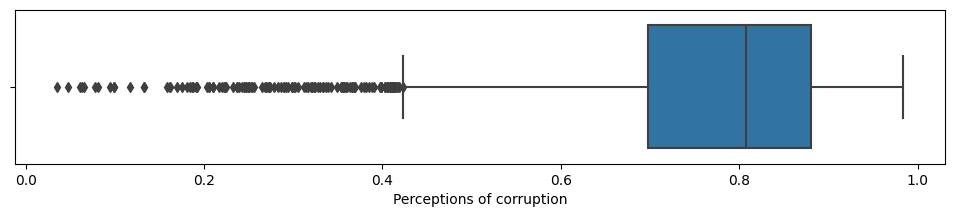

In [15]:
#'Perceptions of corruption' has 130 (!!!) outliers. I'm going to visualize so I know if I need to imputate this column

plt.figure(figsize=(12,2))
sns.boxplot(x=df['Perceptions of corruption'])

#This feature has a lot of outliers, but I want to keep them. I don't want to penalize a country for having a low perception of corruption.
#So I will train the model with a Tree-Based model because they handle outliers and missing data well.

<AxesSubplot: xlabel='gini of household income reported in Gallup, by wp5-year'>

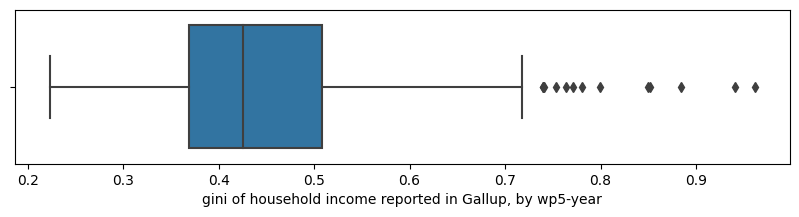

In [16]:
plt.figure(figsize=(10,2))
sns.boxplot(x=df['gini of household income reported in Gallup, by wp5-year'])

In [17]:
df['gini of household income reported in Gallup, by wp5-year'].skew()

0.8757668196738402

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1) I have a new feature list. I removed the 'country' feature because it was the only string in a dataframe of numbers, and it doesn't add any predictive value; it's more of an index. I removed 'year' for a similar reason, because it reflects time and so does not add value when predicting. I removed 'GINI index (World Bank estimate)' because it is missing 62.6761% of data points. I dropped 'Confidence in national government' because it has essentially no correlation with the label (-0.086), and is missing 161 values. It's a weak predictor. Im dropping 'Standard deviation of ladder by country-year' because it's weak correlation (-0.154). I am also dropping 'GINI index (World Bank estimate), average 2000-15', because it's correlation with the label is only -0.172745, it's missing 176 values and has 25 outliers. It's also a redundant feature because we already have 'gini of household income reported in Gallup, by wp5-year'.
2) When it comes to data preparation, i immediately noticed that 'gini of household income reported in Gallup, by wp5-year' has 357 outliers, missing  22.9% of values. I used df['gini...'].skew() and found a value of 0.876, then plotted the feature on a boxplot to visualize the skew and concluded it was a right skew. And so I am going to imputate with the median. There are only 13 outliers, so they won't skew the mean too much, and so i could theoretically imputate with the mean, but a 0.876 skew is very high and so i will play it safe and use the median. I chose to imputate instead of deleting the feature because it has a good correlation with the label (-0.294). Moreover, 'Perception of corruption' has 130 outliers which is a red flag, but it's correlation with the label is -0.425 so I was going to keep the feature no matter what. I considered imputating the outliers, but I felt as though that was valubale data. If a country believes their perception of corruption is low, they should not be punished. And so when i train the model, I will use a Tree-Based model because they handle missing values and outliers well.
3) I will use tree-based models because they handle outliers and missing data values well. Otherwise, the model will be prone to overfitting because of the high amount of outliers in 'Perception of corruption.'
4) I will split the data into training, validation, and testing (60/20/20). I will first train a basic decision tree regressor, then advance to a more powerful ensemble method. Random Forest Regressor, then Gradient Boosting Regressor. They are good at handling to outliers. I will evaluate the model using Root Mean Squared Eroor (RMSE) and R^2 Score. I will then tune hyperparameter's using grid search. I will use cross-validation (10 folds) to ensure the model performs well across different subsets of data. That way, I avoid overfitting. After comparing the model performance across the difference tree-based candidates, I will select the model that performs the best.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [34]:
#Drop Features (Low correlation with label, no predictive value, etc.)
drop_cols = ['country',
             'year',
             'GINI index (World Bank estimate)',
             'Standard deviation of ladder by country-year',
             'GINI index (World Bank estimate), average 2000-15',
            'Confidence in national government']

df_cleaned = df.drop(columns=drop_cols)

df_cleaned.columns

Index(['Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Democratic Quality', 'Delivery Quality',
       'Standard deviation/Mean of ladder by country-year',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

In [36]:
#Rename features so they're easy to manipulate
df_cleaned.rename(columns={'gini of household income reported in Gallup, by wp5-year':'gini_house_income',
                          'Perceptions of corruption':'corruption',
                           'Confidence in national government': 'confidence',
                            'Healthy life expectancy at birth': 'life_expectancy',
                           'Standard deviation/Mean of ladder by country-year': 'ladder_std_mean',
                           'Log GDP per capita':'log_gdp',
                           'Freedom to make life choices':'freedom',
                           'Positive affect':'pos_affect',
                           'Negative affect':'neg_affect',
                           'Democratic Quality':'democracy',
                           'Delivery Quality':'delivery',
                           'Social support':'social_support',
                          'Life Ladder':'life_ladder'},
                            inplace=True)
df_cleaned.columns

Index(['life_ladder', 'log_gdp', 'social_support', 'life_expectancy',
       'freedom', 'Generosity', 'corruption', 'pos_affect', 'neg_affect',
       'democracy', 'delivery', 'ladder_std_mean', 'gini_house_income'],
      dtype='object')

In [42]:
#Impuate Values with median
for col in df_cleaned.columns:
    if df_cleaned[col].isnull().sum() > 0:
        # Use median for right-skewed or outlier-sensitive features
        df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

df_cleaned.isnull().sum()

life_ladder          0
log_gdp              0
social_support       0
life_expectancy      0
freedom              0
Generosity           0
corruption           0
pos_affect           0
neg_affect           0
democracy            0
delivery             0
ladder_std_mean      0
gini_house_income    0
dtype: int64

In [45]:
#Define Features & Label
X = df_cleaned.drop(columns='life_ladder')
y = df_cleaned['life_ladder']

#Train/Test/Split 60/20/20
X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.4,random_state=1234)
X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp, test_size=0.5,random_state=1234)

In [51]:
#Train Decision Tree
dt = DecisionTreeRegressor(random_state=1234)
dt.fit(X_train,y_train)

y_pred_val = dt.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
r2 = r2_score(y_val, y_pred_val)

print(f"Decision Tree RMSE: {rmse:.4f}") #.4f is so we round to four decimal places
print(f"Decision Tree R²: {r2:.4f}")

Decision Tree RMSE: 0.4797
Decision Tree R²: 0.8374


In [57]:
#Train More Powerful Models
# Random Forest
rf = RandomForestRegressor(random_state=1234)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_val)

print(f"Random Forest RMSE: {np.sqrt(mean_squared_error(y_val, rf_preds)):.4f}")
print(f"Random Forest R²: {r2_score(y_val, rf_preds):.4f}")

# Gradient Boosting
gb = GradientBoostingRegressor(random_state=1234)
gb.fit(X_train, y_train)
gb_preds = gb.predict(X_val)

print(f"Gradient Boosting RMSE: {np.sqrt(mean_squared_error(y_val, gb_preds)):.4f}")
print(f"Gradient Boosting R²: {r2_score(y_val, gb_preds):.4f}")

Random Forest RMSE: 0.3246
Random Forest R²: 0.9256
Gradient Boosting RMSE: 0.3470
Gradient Boosting R²: 0.9149


In [62]:
#From our 3 models, Random Forest performs the best because it's RMSE is closest to 0, and it's R^2 score is closest to 1.
#A R^2 Score too close to 1 can lead to overfitting, and same with RMSE too close to 0, so we must be mindful.
#But overall, our model is performing well! Let's try Random Forest on our test data

In [64]:
final_model = rf
test_preds = final_model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
r2_test = r2_score(y_test, test_preds)

print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test R²: {r2_test:.4f}")

Test RMSE: 0.3578
Test R²: 0.8940


TakeawaOur machine learning model, trained using Random Forest Regression, effectively predicts national happiness levels with high accuracy. With a test R² of 0.894 and RMSE of 0.3578, it captures the majority of variability in happiness outcomes, suggesting that features such as GDP, freedom, social support, and others are strong predictors of national well-being.”